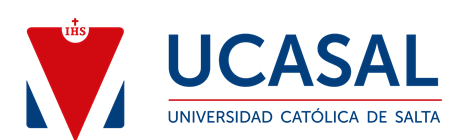
# Minería de Datos

## **Trabajo Integrador**


---

Docente:
*	Mgtr. CARDOSO, Alejandra.


Estudiante:
*	Ing. PÉREZ, Matias Agustín.


# Dataset

Para el desarrollo del trabajo, se seleccionó el siguiente DataSet:

Bank Marketing Data Set: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

# Importación de librerías

---



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from IPython.display import Image
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


# Ruta del DataSet
---

In [ ]:
url_bank = "https://raw.githubusercontent.com/mataguper20/tfimineria/main/bank-additional.csv"

## Carga de los datos en el DataFrame y selección de target

In [ ]:
df_bank = pd.read_csv(url_bank, sep=";")

In [ ]:
target_bank = "y"

# Visualización
---

## Visualización de información del dataset

In [ ]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4119 entries, 0 to 4118
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             4119 non-null   int64  
 1   job             4119 non-null   object 
 2   marital         4119 non-null   object 
 3   education       4119 non-null   object 
 4   default         4119 non-null   object 
 5   housing         4119 non-null   object 
 6   loan            4119 non-null   object 
 7   contact         4119 non-null   object 
 8   month           4119 non-null   object 
 9   day_of_week     4119 non-null   object 
 10  duration        4119 non-null   int64  
 11  campaign        4119 non-null   int64  
 12  pdays           4119 non-null   int64  
 13  previous        4119 non-null   int64  
 14  poutcome        4119 non-null   object 
 15  emp.var.rate    4119 non-null   float64
 16  cons.price.idx  4119 non-null   float64
 17  cons.conf.idx   4119 non-null   f

## Visualización de valores categóricos en forma de columnas y sus descripciones


Columna: job
job
admin.           1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: count, dtype: int64


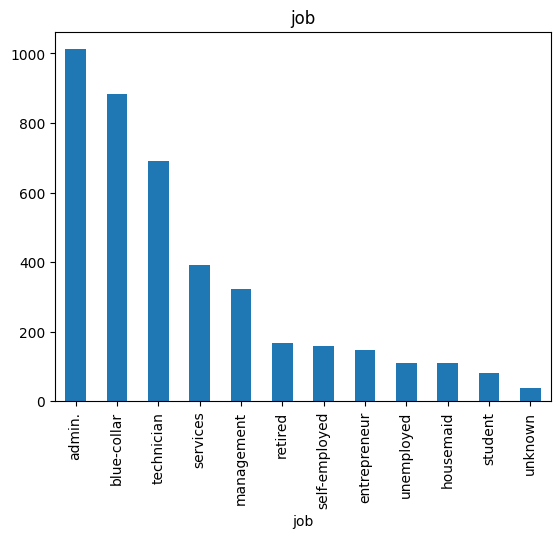


Columna: marital
marital
married     2509
single      1153
divorced     446
unknown       11
Name: count, dtype: int64


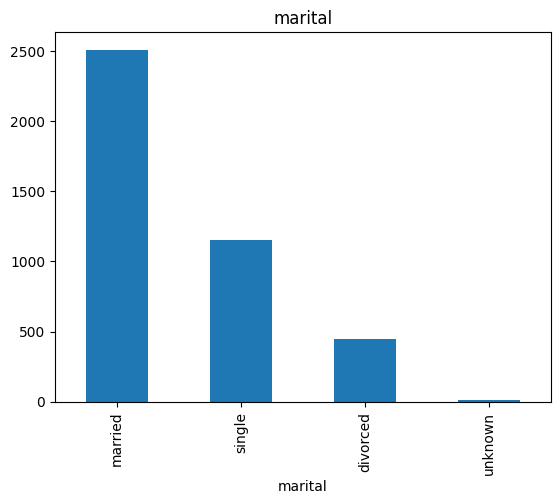


Columna: education
education
university.degree      1264
high.school             921
basic.9y                574
professional.course     535
basic.4y                429
basic.6y                228
unknown                 167
illiterate                1
Name: count, dtype: int64


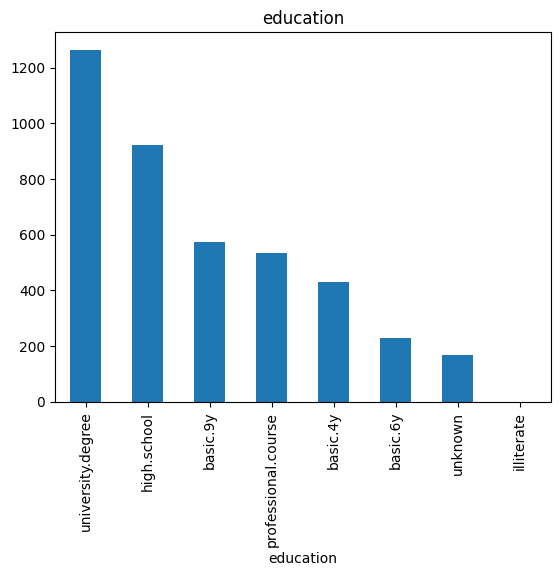


Columna: default
default
no         3315
unknown     803
yes           1
Name: count, dtype: int64


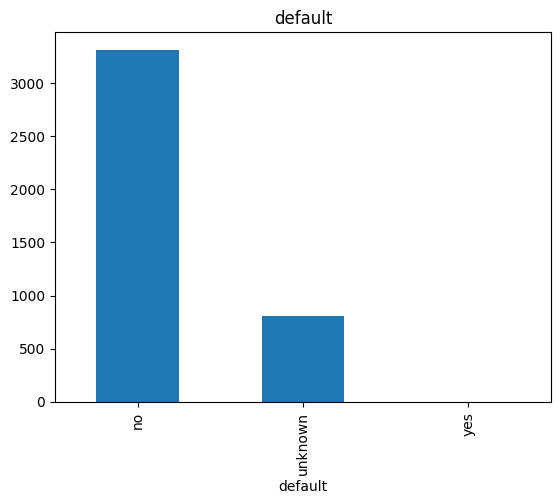


Columna: housing
housing
yes        2175
no         1839
unknown     105
Name: count, dtype: int64


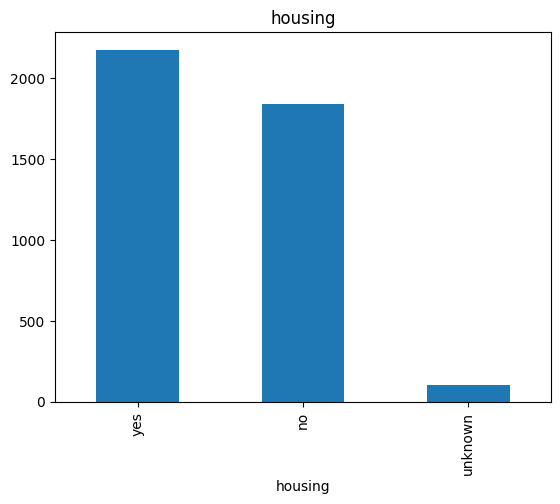


Columna: loan
loan
no         3349
yes         665
unknown     105
Name: count, dtype: int64


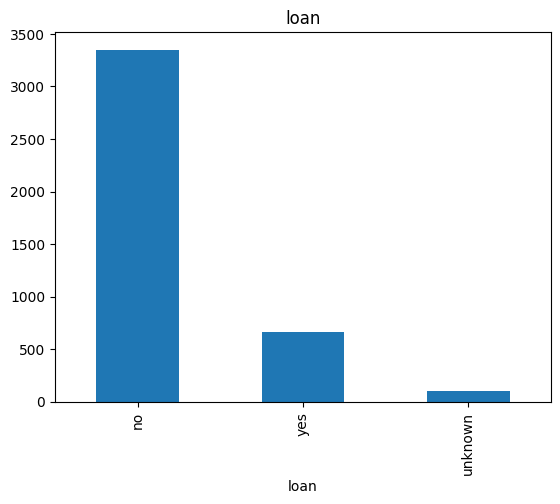


Columna: contact
contact
cellular     2652
telephone    1467
Name: count, dtype: int64


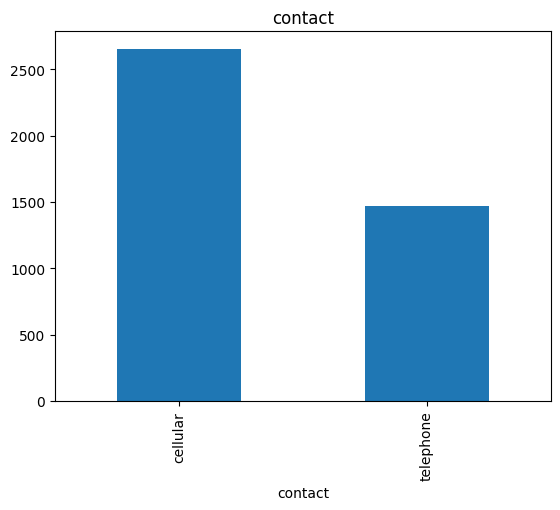


Columna: month
month
may    1378
jul     711
aug     636
jun     530
nov     446
apr     215
oct      69
sep      64
mar      48
dec      22
Name: count, dtype: int64


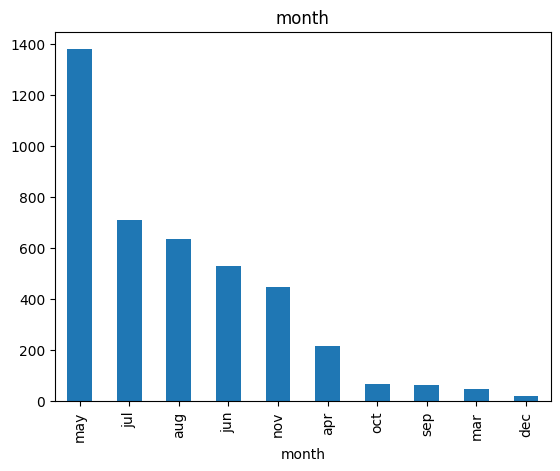


Columna: day_of_week
day_of_week
thu    860
mon    855
tue    841
wed    795
fri    768
Name: count, dtype: int64


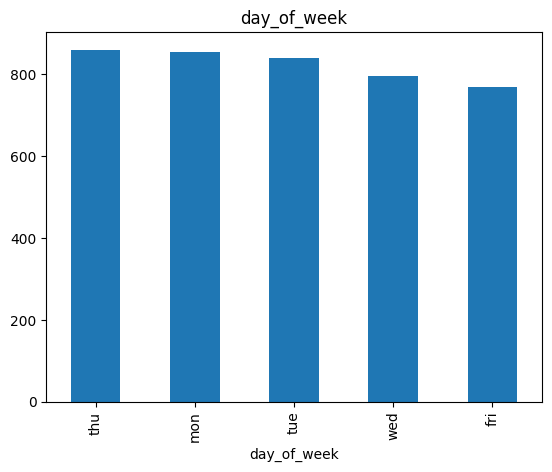


Columna: poutcome
poutcome
nonexistent    3523
failure         454
success         142
Name: count, dtype: int64


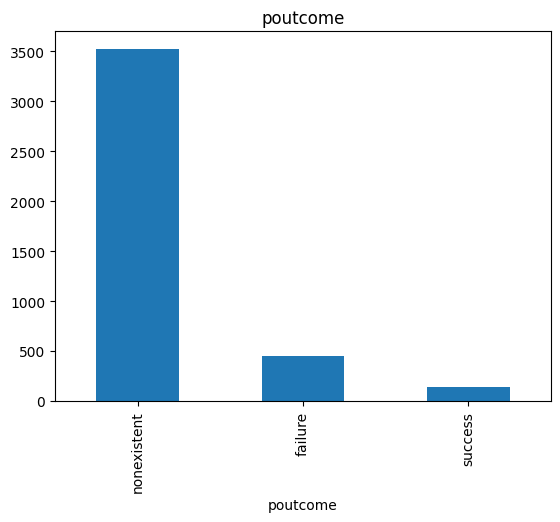


Columna: y
y
no     3668
yes     451
Name: count, dtype: int64


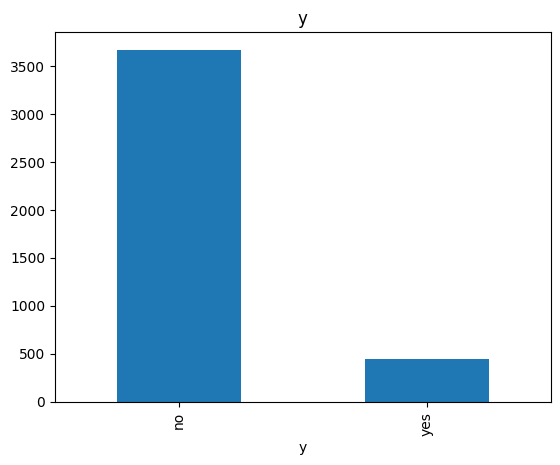

In [ ]:
columnas = df_bank.select_dtypes(include=['object']).columns

for col in columnas:
    print(f"\nColumna: {col}")

    # Describir los datos
    print(df_bank[col].value_counts())

    # Graficar los datos
    df_bank[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.show()


## Valores faltantes

In [ ]:
# Contar los valores faltantes en cada columna
valores_faltantes = df_bank.isnull().sum()

# Imprimir la tabla de valores faltantes
print(valores_faltantes)

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64


### Visualización de Capaña Vs Duración por target

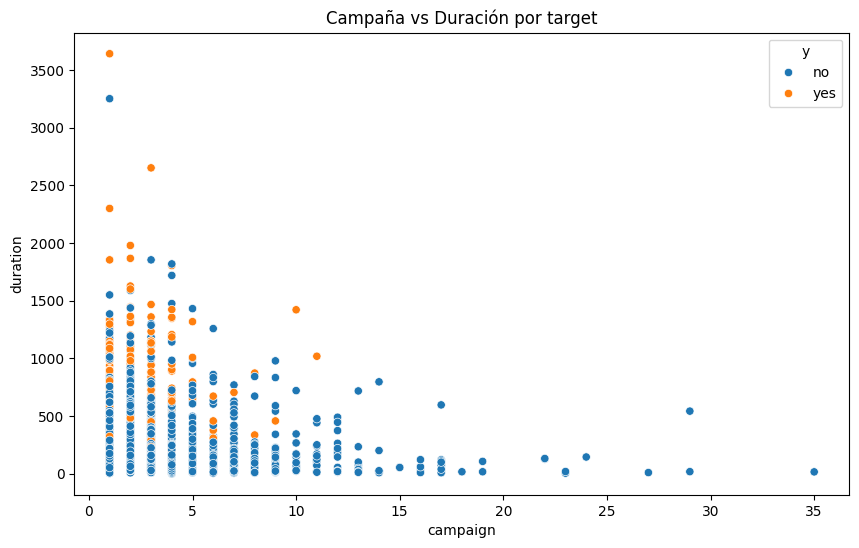

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='campaign', y='duration', hue=target_bank, data=df_bank)
plt.title('Campaña vs Duración por target')
plt.show()

### Visualización de Job, Marital, Educación y Month contra target

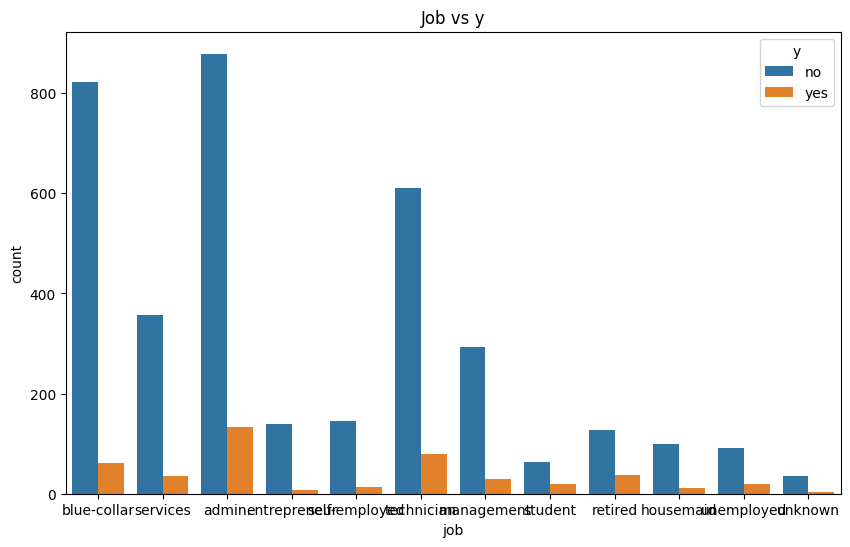

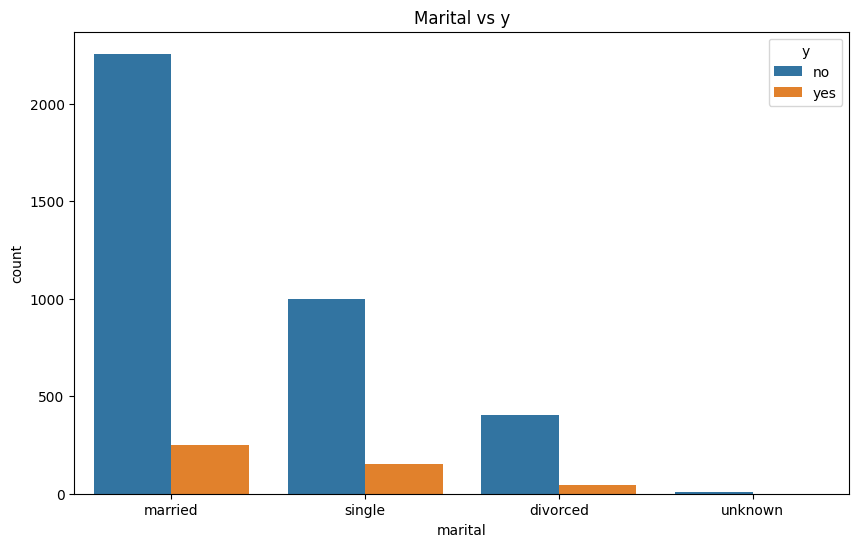

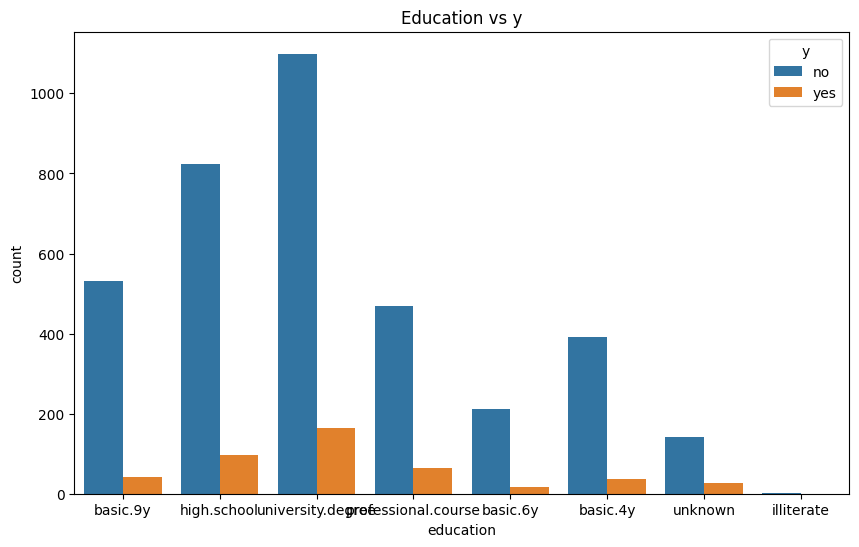

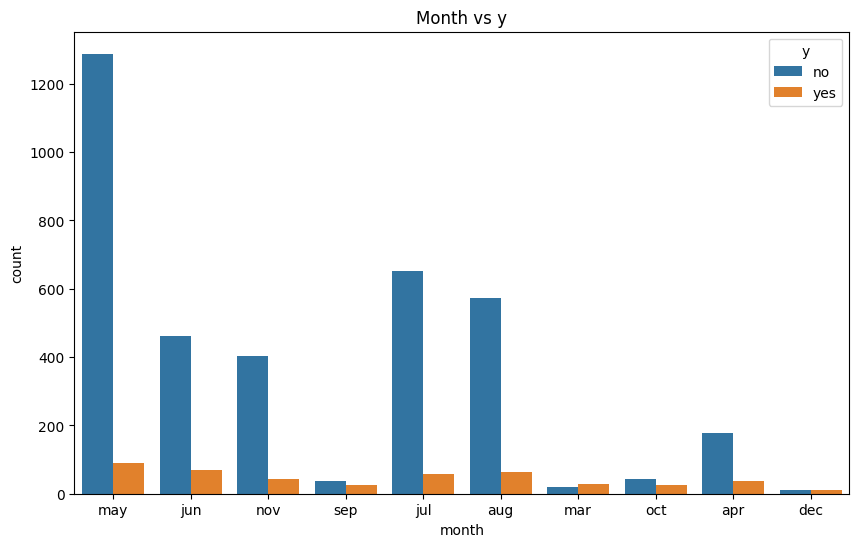

In [ ]:
categories = ['job', 'marital', 'education', 'month']

for category in categories:
    plt.figure(figsize=(10,6))
    sns.countplot(x=category, hue=target_bank, data=df_bank)
    plt.title(f'{category.capitalize()} vs y')
    plt.show()


## Correlación entre los datos numñericos

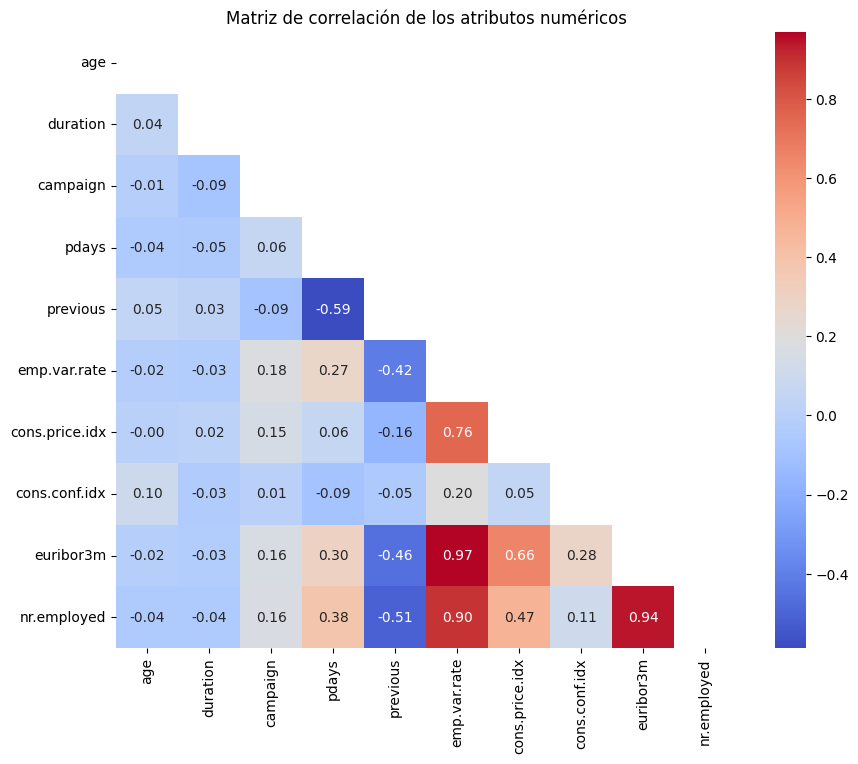

In [ ]:
# Seleccionar solo las columnas numéricas
numeric_columns = df_bank.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Crear una máscara para el triángulo superior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Crear una figura y un eje
plt.figure(figsize=(10, 8))

# Crear el heatmap
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm')

# Mostrar el gráfico
plt.title('Matriz de correlación de los atributos numéricos')
plt.show()


## BoxPlot de los campos numéricos

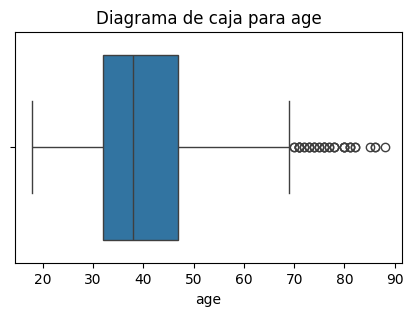

Estadísticas para age:

count    4119.000000
mean       40.113620
std        10.313362
min        18.000000
25%        32.000000
50%        38.000000
75%        47.000000
max        88.000000
Name: age, dtype: float64 



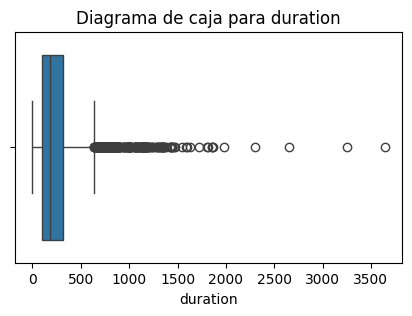

Estadísticas para duration:

count    4119.000000
mean      256.788055
std       254.703736
min         0.000000
25%       103.000000
50%       181.000000
75%       317.000000
max      3643.000000
Name: duration, dtype: float64 



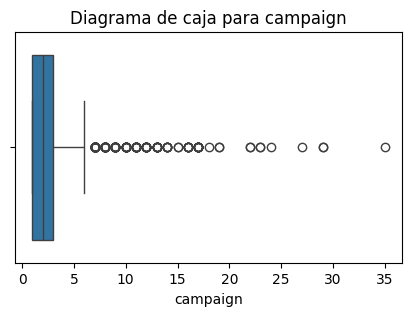

Estadísticas para campaign:

count    4119.000000
mean        2.537266
std         2.568159
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        35.000000
Name: campaign, dtype: float64 



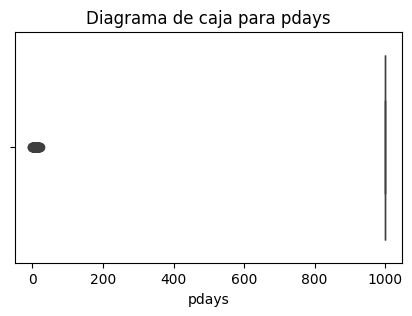

Estadísticas para pdays:

count    4119.000000
mean      960.422190
std       191.922786
min         0.000000
25%       999.000000
50%       999.000000
75%       999.000000
max       999.000000
Name: pdays, dtype: float64 



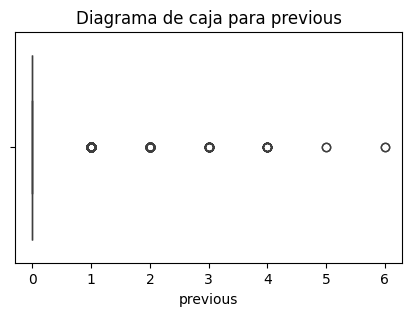

Estadísticas para previous:

count    4119.000000
mean        0.190337
std         0.541788
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         6.000000
Name: previous, dtype: float64 



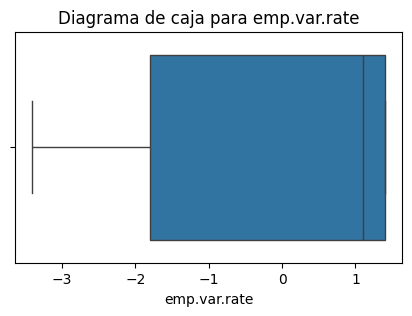

Estadísticas para emp.var.rate:

count    4119.000000
mean        0.084972
std         1.563114
min        -3.400000
25%        -1.800000
50%         1.100000
75%         1.400000
max         1.400000
Name: emp.var.rate, dtype: float64 



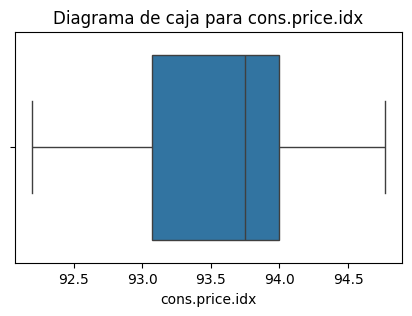

Estadísticas para cons.price.idx:

count    4119.000000
mean       93.579704
std         0.579349
min        92.201000
25%        93.075000
50%        93.749000
75%        93.994000
max        94.767000
Name: cons.price.idx, dtype: float64 



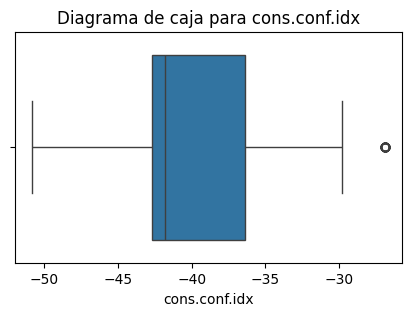

Estadísticas para cons.conf.idx:

count    4119.000000
mean      -40.499102
std         4.594578
min       -50.800000
25%       -42.700000
50%       -41.800000
75%       -36.400000
max       -26.900000
Name: cons.conf.idx, dtype: float64 



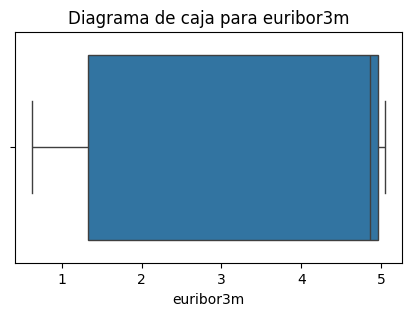

Estadísticas para euribor3m:

count    4119.000000
mean        3.621356
std         1.733591
min         0.635000
25%         1.334000
50%         4.857000
75%         4.961000
max         5.045000
Name: euribor3m, dtype: float64 



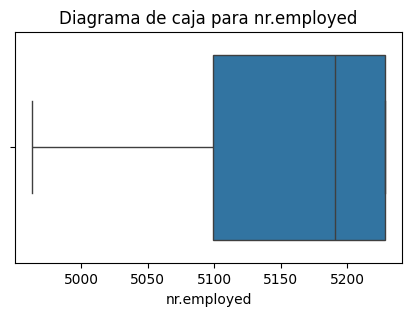

Estadísticas para nr.employed:

count    4119.000000
mean     5166.481695
std        73.667904
min      4963.600000
25%      5099.100000
50%      5191.000000
75%      5228.100000
max      5228.100000
Name: nr.employed, dtype: float64 



In [ ]:
# Seleccionar solo las columnas numéricas
numeric_columns = df_bank.select_dtypes(include=[np.number])

for column in numeric_columns:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=df_bank[column])
    plt.title(f'Diagrama de caja para {column}')
    plt.show()

    print(f'Estadísticas para {column}:\n')
    print(df_bank[column].describe(), '\n')


### Eliminación de valores atípicos

In [ ]:
outliers_columns = ['age', 'duration', 'campaign']

for column in outliers_columns:
    # Calcular el IQR de la columna
    Q1 = df_bank[column].quantile(0.25)
    Q3 = df_bank[column].quantile(0.75)
    IQR = Q3 - Q1

    # Definir los límites para los valores atípicos
    min = Q1 - 1.5 * IQR
    max = Q3 + 1.5 * IQR

    # Filtrar los valores atípicos
    df_bank = df_bank[(df_bank[column] >= min) & (df_bank[column] <= max)]


## Visualización post eliminación de valores atipicos

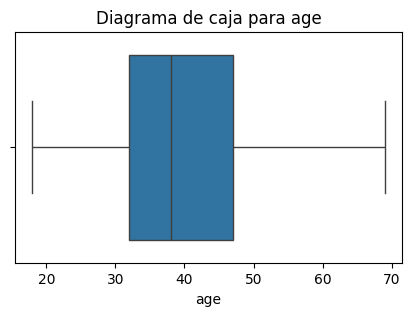

Estadísticas para age:

count    3567.000000
mean       39.668629
std         9.678081
min        18.000000
25%        32.000000
50%        38.000000
75%        47.000000
max        69.000000
Name: age, dtype: float64 



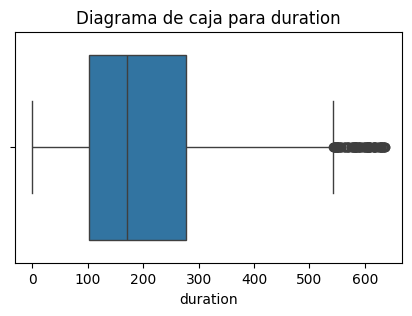

Estadísticas para duration:

count    3567.000000
mean      207.332492
std       138.602661
min         0.000000
25%       102.000000
50%       171.000000
75%       278.000000
max       636.000000
Name: duration, dtype: float64 



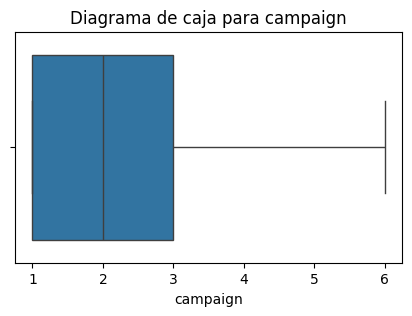

Estadísticas para campaign:

count    3567.000000
mean        2.044015
std         1.276661
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         6.000000
Name: campaign, dtype: float64 



In [ ]:
# Seleccionar solo las columnas numéricas
numeric_columns = outliers_columns

# Crear boxplots para cada columna numérica
for column in numeric_columns:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x=df_bank[column])
    plt.title(f'Diagrama de caja para {column}')
    plt.show()

    # Imprimir las estadísticas descriptivas
    print(f'Estadísticas para {column}:\n')
    print(df_bank[column].describe(), '\n')


## Agrupación de basic.9y, basic.6y y basic.4y

In [ ]:
# Definir el diccionario de reemplazo
replace_dict = {"education": {"basic.9y": "basic", "basic.6y": "basic", "basic.4y": "basic"}}

# Reemplazar las categorías en la columna 'education'
df_bank.replace(replace_dict, inplace=True)

# Ver la nueva distribución
print(df_bank['education'].value_counts())


education
university.degree      1085
basic                  1076
high.school             801
professional.course     462
unknown                 142
illiterate                1
Name: count, dtype: int64


### Gráfico de barras para la columna 'education'post unión de basic

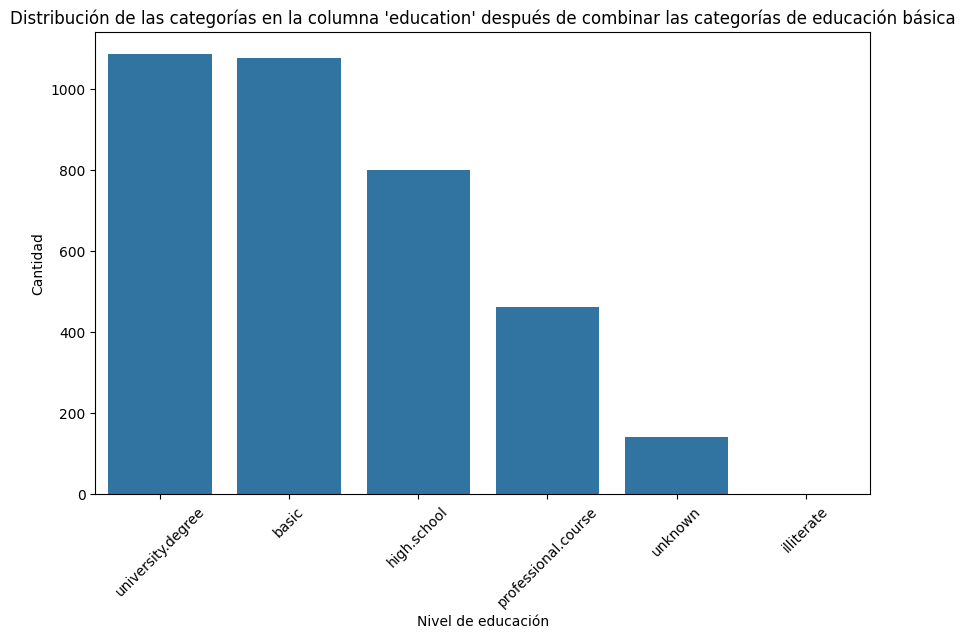

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_bank, x='education', order=df_bank['education'].value_counts().index)
plt.title('Distribución de las categorías en la columna \'education\' después de combinar las categorías de educación básica')
plt.xlabel('Nivel de educación')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

## Codificación de categóricos

In [ ]:
# Crear un objeto LabelEncoder
label_encoder = LabelEncoder()

# Obtener las columnas categóricas
categorical_cols = df_bank.select_dtypes(include=['object']).columns

# Aplicar LabelEncoder a las columnas categóricas
for col in categorical_cols:
    df_bank[col] = label_encoder.fit_transform(df_bank[col])


## Filtrado de columnas por correlación post codificación

In [ ]:
# Crear una matriz de correlación
corr_matrix = df_bank.corr().abs()

# Crear una lista para almacenar las columnas a eliminar
columnas_a_eliminar = []

# Iterar a través de la matriz de correlación
for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if corr_matrix.iloc[i, j] >= 0.5:
            colname = corr_matrix.columns[i]
            columnas_a_eliminar.append(colname)

# Eliminar las columnas de la lista columns_to_delete del DataFrame
df_bank = df_bank.drop(columnas_a_eliminar, axis=1)


### Columnas a Eliminar por Correlación

In [ ]:
columnas_a_eliminar

['previous',
 'cons.price.idx',
 'cons.price.idx',
 'euribor3m',
 'euribor3m',
 'nr.employed',
 'nr.employed',
 'nr.employed']

### Matriz de Correlación post filtrado

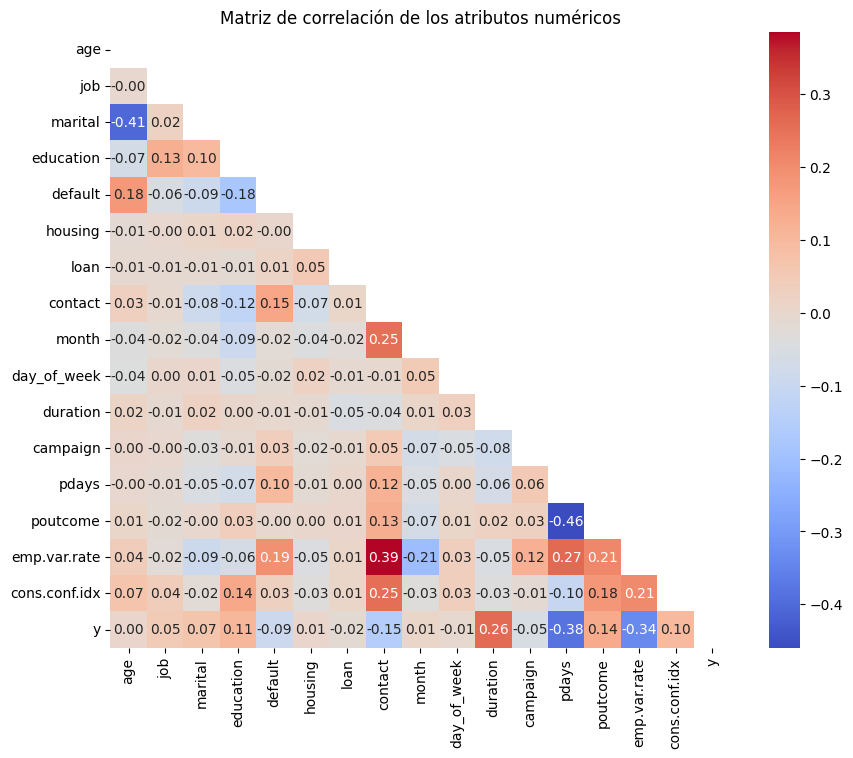

In [ ]:
# Seleccionar solo las columnas numéricas
numeric_columns = df_bank.select_dtypes(include=[np.number])

# Calcular la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Crear una máscara para el triángulo superior
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Crear una figura y un eje
plt.figure(figsize=(10, 8))

# Crear el heatmap
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap='coolwarm')

# Mostrar el gráfico
plt.title('Matriz de correlación de los atributos numéricos')
plt.show()


## Selección de Datos para Target y DataFrame restante

In [ ]:
y = df_bank[target_bank]
df_bank = df_bank.drop(target_bank, axis=1)


## Estandarización de los datos mediante StandardScaler

In [ ]:
# Crear un objeto StandardScaler
scaler = StandardScaler()

# Ajustar el scaler a los datos y transformarlos
df_bank_normalized = pd.DataFrame(scaler.fit_transform(df_bank), columns=df_bank.columns)


## Eliminación del campo 'duration'

In [ ]:
# Eliminar la columna 'duration'
df_bank_normalized = df_bank_normalized.drop('duration', axis=1)


## Datasets para entrenamiento y testeo

In [ ]:

X = df_bank_normalized

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
print("Entrenamiento",len(X_train))
print("Testeo",len(X_test))

Entrenamiento 2496
Testeo 1071


# Modelo 1 de Red
---

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py:594: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


Accuracy: 0.9215686274509803
Precision: 0.5862068965517241
Recall: 0.19101123595505617
F1-score: 0.288135593220339


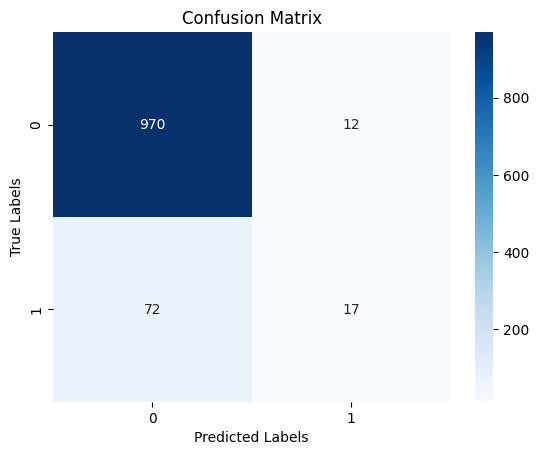

In [ ]:
# Definir la arquitectura de la red neuronal
n_capas_ocultas = 2
n_neuronas_por_capa = (32, 16)  # Dos capas ocultas con 64 y 32 neuronas respectivamente
tasa_aprendizaje = 0.001
funcion_activacion = 'relu'
criterio_parada = 50  # Detener el entrenamiento si no hay mejora en la pérdida en 5 épocas consecutivas

# Crear un objeto de red neuronal con los parámetros definidos
model = MLPClassifier(hidden_layer_sizes=n_neuronas_por_capa, activation=funcion_activacion,
                      learning_rate_init=tasa_aprendizaje, early_stopping=criterio_parada,
                      random_state=42)

# Entrenar la red neuronal utilizando los datos de entrenamiento
model.fit(X_train, y_train)

# Obtener las predicciones en los datos de prueba
y_pred = model.predict(X_test)

# Calcular las métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Imprimir las métricas de rendimiento
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

# Crear el gráfico de mapa de calor
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')

# Configurar etiquetas y título
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Mostrar el gráfico
plt.show()

# Modelo 2 de Red
---

/usr/local/lib/python3.10/dist-packages/sklearn/utils/_param_validation.py:594: FutureWarning: Passing an int for a boolean parameter is deprecated in version 1.2 and won't be supported anymore in version 1.4.
  warnings.warn(


Accuracy: 0.9299719887955182
Precision: 0.6521739130434783
Recall: 0.33707865168539325
F1-score: 0.4444444444444445


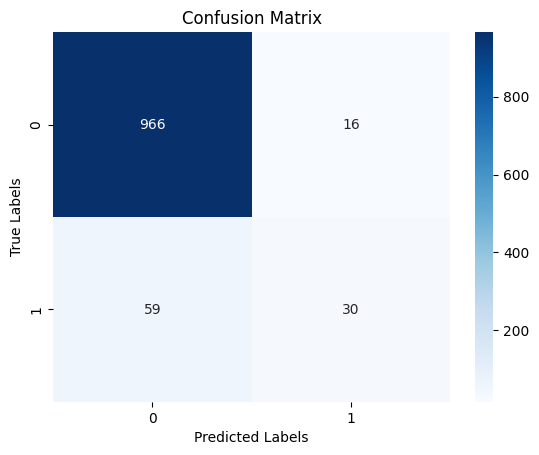

In [ ]:
# Definir la arquitectura de la red neuronal
n_capas_ocultas = 2
n_neuronas_por_capa = (64, 32)  # Dos capas ocultas con 64 y 32 neuronas respectivamente
tasa_aprendizaje = 0.001
funcion_activacion = 'tanh'
criterio_parada = 50  # Detener el entrenamiento si no hay mejora en la pérdida en 5 épocas consecutivas

# Crear un objeto de red neuronal con los parámetros definidos
model = MLPClassifier(hidden_layer_sizes=n_neuronas_por_capa, activation=funcion_activacion,
                      learning_rate_init=tasa_aprendizaje, early_stopping=criterio_parada,
                      random_state=42)

# Entrenar la red neuronal utilizando los datos de entrenamiento
model.fit(X_train, y_train)



# Obtener las predicciones en los datos de prueba
y_pred = model.predict(X_test)

# Calcular las métricas de rendimiento
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

# Imprimir las métricas de rendimiento
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)


# Crear el gráfico de mapa de calor
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')

# Configurar etiquetas y título
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

# Mostrar el gráfico
plt.show()

# Experimentación con distintos hiperparámetros
---

In [ ]:
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

# Definir el clasificador
mlp = MLPClassifier(random_state=42)

# Definir la grilla de parámetros
param_grid = {
    'hidden_layer_sizes': [(16,), (32, 16), (64, 32, 16)],  # Número de neuronas por capa
    'activation': ['relu', 'tanh'],  # Función de activación
    'max_iter': [50, 100],  # Número de épocas
    'learning_rate_init': [0.001, 0.01],  # Tasa de aprendizaje
}

# Definir las métricas que queremos evaluar
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

# Crear el GridSearchCV
grid_search = GridSearchCV(estimator=mlp, param_grid=param_grid, scoring=scoring, refit='f1', cv=5, verbose=1)

# Entrenar el modelo usando GridSearchCV
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros
best_params = grid_search.best_params_
print(f"Mejores parámetros: {best_params}")

# Evaluar el modelo con los mejores parámetros en los datos de prueba
y_pred = grid_search.predict(X_test)

# Calcular las métricas con el mejor modelo
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)




Fitting 5 folds for each of 24 candidates, totalling 120 fits


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py

Mejores parámetros: {'activation': 'tanh', 'hidden_layer_sizes': (32, 16), 'learning_rate_init': 0.01, 'max_iter': 50}
Accuracy: 0.9084967320261438
Precision: 0.4457831325301205
Recall: 0.4157303370786517
F1-score: 0.43023255813953487


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
print(f"Mejores parámetros: {best_params}")
# Imprimir las métricas
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Mejores parámetros: {'activation': 'tanh', 'hidden_layer_sizes': (32, 16), 'learning_rate_init': 0.01, 'max_iter': 50}
Accuracy: 0.9084967320261438
Precision: 0.4457831325301205
Recall: 0.4157303370786517
F1-score: 0.43023255813953487
